In [1]:
import os
import warnings

import pandas

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

from soma.generators.dc2 import DC2Generator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_sample_size
from soma.util.plot import plot_errors, plot_time

In [2]:
plot_dir = os.path.expanduser('~/Plots/power_sample_size')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [4]:
samples = np.array([100, 250, 500, 1000, 2500, 5000, 10000])
repeat = 200

# DC2 MAG Filtered

In [5]:
dc2 = DC2Generator()
dc2_abs = DC2Generator(abs_mag=22)

In [7]:
#dc2_results = stat_errors_vs_sample_size(dc2_abs, dc2, tests, samples, repeat=repeat)
#dc2_results.to_csv('../../results/sample_size/dc2_mag_power_samples.csv')
dc2_results = pandas.read_csv('../../results/sample_size/dc2_mag_power_samples.csv', index_col=[0, 1])

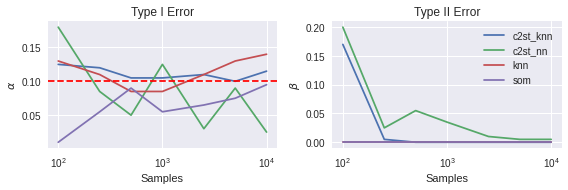

In [9]:
dc2_abs_fig = plot_errors(dc2_results, logscale=True)
dc2_abs_fig.savefig(os.path.join(plot_dir, 'dc2_mag_power_samples.eps'))

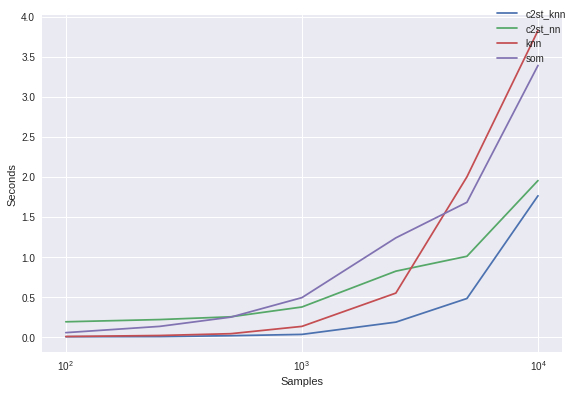

In [10]:
dc2_mag_time = plot_time(dc2_results, logscale=True)
dc2_mag_time.savefig(os.path.join(plot_dir, 'dc2_mag_time_samples.eps'))

# DC2 SNR

In [11]:
dc2_snr = DC2Generator(snr=10)

In [12]:
#dc2_snr_results = stat_errors_vs_sample_size(dc2_snr, dc2, tests, samples, repeat=repeat)
#dc2_snr_results.to_csv('../../results/sample_size/dc2_snr_results_samples.csv')
dc2_snr_results = pandas.read_csv('../../results/sample_size/dc2_snr_results_samples.csv', index_col=[0, 1])

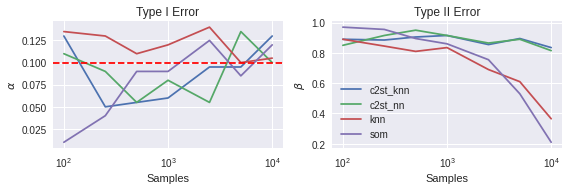

In [13]:
dc2_snr_fig = plot_errors(dc2_snr_results, logscale=True)
dc2_snr_fig.savefig(os.path.join(plot_dir, 'dc2_snr_power_samples.eps'))

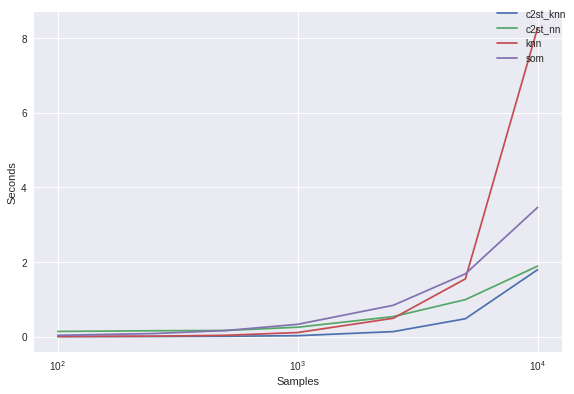

In [14]:
dc2_snr_time = plot_time(dc2_snr_results, logscale=True)
dc2_snr_time.savefig(os.path.join(plot_dir, 'dc2_snr_time_samples.eps'))